In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 668.6 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 3.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.40.0 requires pyarrow<8.0.0,>=0.15.1, but you have pyarrow 8.0.0 which is incompatible.


In [69]:
msft = yf.Ticker("^GSPC")

# get stock info
#msft.info

# get historical market data
hist = msft.history(period="5y")
hist.info()
hist.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-02-02 00:00:00-05:00 to 2023-02-01 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.9 KB


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

7

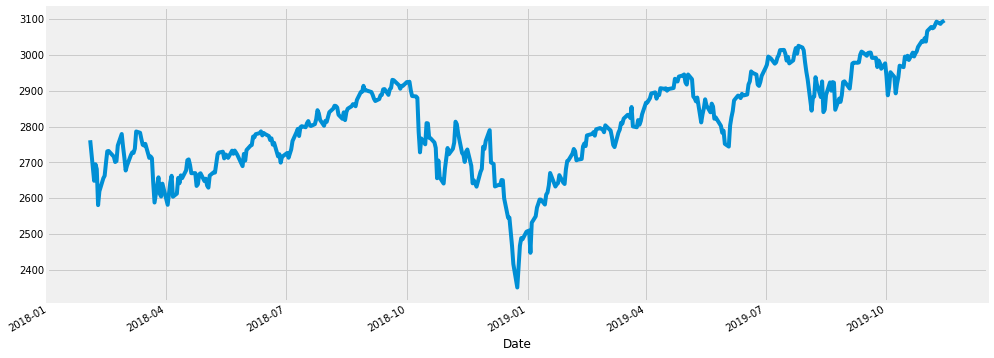

In [70]:
plt.rcParams["figure.figsize"] = [15,6]
hist['Close'][0:450].plot()
hist.shape[1]

In [71]:
data_target = hist.filter(['Close'])


target = data_target.values
#target = target+
# Splitting the dataset into training and test
# Target Variable: Close stock price value
#np.append(target,[])
training_data_len = int(np.ceil(len(target)* 0.75)) # training set has 75% of the data
training_data_len

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_scaled_data = scaler.fit_transform(target)

In [72]:
# Create a training dataset containing the last 180-day closing price values we want to use to estimate the 181st closing price value.
train_data = training_scaled_data[0:int(training_data_len)  , : ]

X_train = []
y_train = []
for i in range(120, len(train_data)):
    X_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #(854 values, 180 time-steps, 1 output)

Number of rows and columns:  (824, 120, 1)


In [73]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.33))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 15, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 40, return_sequences = False))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
#model.add(LSTM(units = 50))
#model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
26/26 [==============================] - 12s 235ms/step - loss: 0.0615
Epoch 2/120
26/26 [==============================] - 6s 215ms/step - loss: 0.0095
Epoch 3/120
26/26 [==============================] - 6s 219ms/step - loss: 0.0060
Epoch 4/120
26/26 [==============================] - 6s 217ms/step - loss: 0.0052
Epoch 5/120
26/26 [==============================] - 6s 217ms/step - loss: 0.0050
Epoch 6/120
26/26 [==============================] - 6s 243ms/step - loss: 0.0052
Epoch 7/120
26/26 [==============================] - 6s 219ms/step - loss: 0.0048
Epoch 8/120
26/26 [==============================] - 6s 225ms/step - loss: 0.0051
Epoch 9/120
26/26 [==============================] - 6s 226ms/step - loss: 0.0051
Epoch 10/120
26/26 [==============================] - 6s 219ms/step - loss: 0.0048
Epoch 11/120
26/26 [==============================] - 6s 225ms/step - loss: 0.0043
Epoch 12/120
26/26 [==============================] - 6s 224ms/step - loss: 0.0044
Epoch 13/120

In [74]:
test_data = training_scaled_data[training_data_len - 120: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(120,len(test_data)):
    X_test.append(test_data[i-120:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)
print(X_test.shape)
#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

(314, 120)
Number of rows and columns:  (314, 120, 1)


In [75]:
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(314, 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


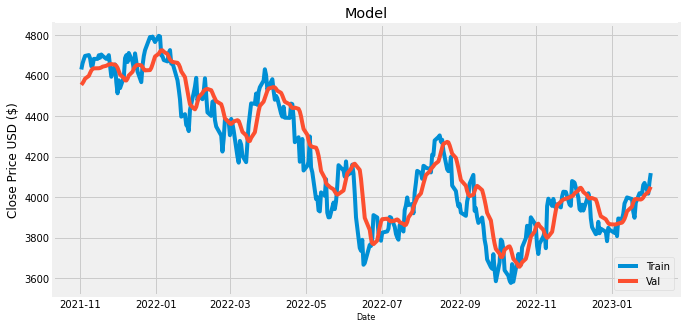

In [77]:
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [65]:
#pnp1 = model.predict(X_test)
#temp_data=test_data[-123:]
#for x in range(3):
#pred=model.predict(temp_data)

In [78]:
x_input=test_data[314:].reshape(1,-1)
x_input.shape

(1, 120)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [80]:
from numpy import array

lst_output=[]
n_steps=120
i=0
while(i<30):
    
    if(len(temp_input)>120):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.71456766]
121
1 day input [0.79821108 0.80485007 0.80799956 0.79582363 0.79961402 0.7780209
 0.74266174 0.73904327 0.74374795 0.76654844 0.71127241 0.70070261
 0.68333356 0.67115772 0.67578818 0.65914597 0.65286654 0.6808758
 0.69115644 0.71506279 0.73188474 0.66243999 0.66764485 0.65019385
 0.63924494 0.64962327 0.63244578 0.60665606 0.59417543 0.56887025
 0.55394741 0.55091907 0.57895561 0.54825411 0.52682135 0.56308708
 0.60704682 0.60405759 0.588912   0.54793757 0.53728173 0.52807957
 0.52346475 0.55975786 0.52582491 0.56289953 0.5793229  0.56962438
 0.55814409 0.59212789 0.60955161 0.63368844 0.62254806 0.61344349
 0.65008052 0.63871738 0.63251227 0.59483969 0.5792877  0.59908331
 0.61324812 0.62157509 0.59049457 0.6716931  0.68597896 0.67203692
 0.68551008 0.67263869 0.66785979 0.67519814 0.66918049 0.69014054
 0.69939355 0.69894813 0.67465103 0.67218536 0.72004489 0.71866161
 0.7167586  0.68828838 0.66578878 0.66292061 0.67448303 0.66310034
 0.68505293 0.69641988 0.68691292 0

In [81]:
print(scaler.inverse_transform(lst_output))

[[4066.09299005]
 [4078.24995019]
 [4087.55323256]
 [4094.35458942]
 [4099.48321641]
 [4103.76281782]
 [4107.79652825]
 [4111.93426949]
 [4116.32369814]
 [4120.98738982]
 [4125.88690498]
 [4130.96671986]
 [4136.17436145]
 [4141.46971229]
 [4146.82363766]
 [4152.21615509]
 [4157.63185828]
 [4163.05823912]
 [4168.48461996]
 [4173.90230614]
 [4179.302603  ]
 [4184.67925651]
 [4190.02631767]
 [4195.34012559]
 [4200.61686681]
 [4205.85471089]
 [4211.05152229]
 [4216.20699594]
 [4221.32006407]
 [4226.38935384]]
